In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# load dataset
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# shape of training data
print(f'Training Data:{x_train.shape}')
print(f'Training Data:{y_train.shape}')

Training Data:(60000, 28, 28)
Training Data:(60000,)


In [4]:
# shape of testing data
print(f'Testing Data:{x_test.shape}')
print(f'Testing Data:{y_test.shape}')

Testing Data:(10000, 28, 28)
Testing Data:(10000,)


In [5]:
# Decoded labels of dataset
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

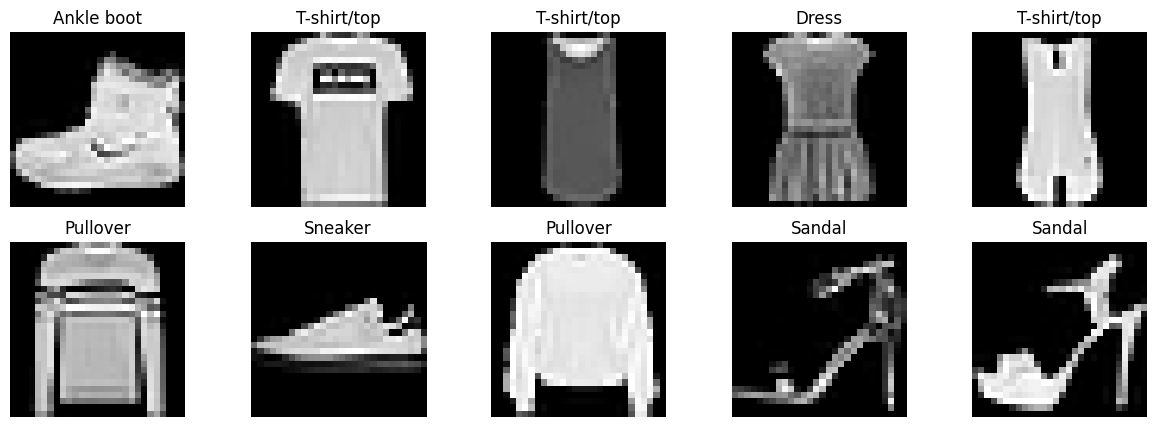

In [6]:
# Show randomly images from dataset
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(fashion_mnist_labels[y_train[i]])
  plt.axis('off')
plt.show()

In [7]:
# Normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Change dimension
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [15]:
# Import model and layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import regularizers

In [23]:
model = Sequential()

# Convolution Block 1
model.add(Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPool2D(2,2))

# Convolution Block 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPool2D(2,2))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [24]:
# Check model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,578 (1.85 MB)

 Trainable params: 485,578 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Compole the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
# Fit the model on 10 epochs at once
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9072 - loss: 0.3528 - val_accuracy: 0.9009 - val_loss: 0.3775
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9043 - loss: 0.3504 - val_accuracy: 0.8949 - val_loss: 0.3809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.3399 - val_accuracy: 0.8924 - val_loss: 0.3856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9101 - loss: 0.3350 - val_accuracy: 0.9010 - val_loss: 0.3631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9127 - loss: 0.3307 - val_accuracy: 0.9019 - val_loss: 0.3522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9128 - loss: 0.3229 - val_accuracy: 0.8962 - val_loss: 0.3801
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9134 - loss: 0.3210 - val_accuracy: 0.8979 - val_loss: 0.3710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9168 - loss: 0.3158 - 

In [28]:
# Check accuracy on testing data
loss,accuracy = model.evaluate(x_test,y_test)
print("Testing Accuracy:",accuracy)
print("Testing Loss:",loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9046 - loss: 0.3541
Testing Accuracy: 0.9060999751091003
Testing Loss: 0.34531956911087036


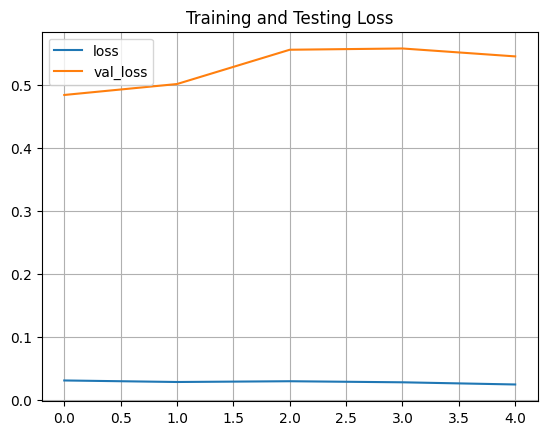

In [ ]:
# Visualize the loss and val_loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("Training and Testing Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Prediction on training data
pred = model.predict(x_test)
prediction = np.argmax(pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


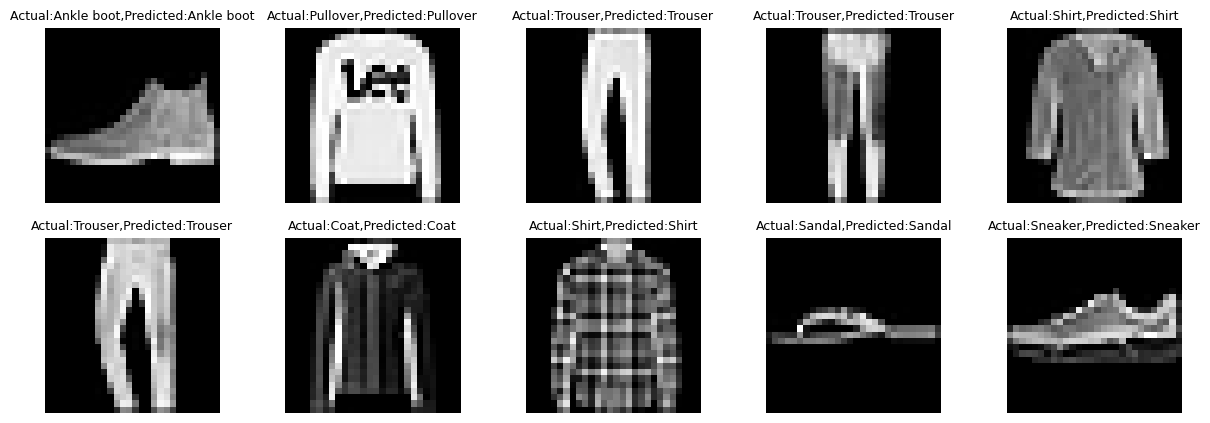

In [ ]:
# Check accurate prediction of model
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f'Actual:{fashion_mnist_labels[y_test[i]]},Predicted:{fashion_mnist_labels[prediction[i]]}',size=9)
  plt.axis('off')
plt.show()

In [ ]:
# Load the image with (28,28) size
img_path = 'shirt2.jpg'
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(28,28),color_mode='grayscale')

In [ ]:
# Convert image to numpy array
img_array = tf.keras.preprocessing.image.img_to_array(image)

In [ ]:
# Normalize the image
img_array = img_array / 255.0

In [ ]:
# because image is with white background and model train on images with black background
img_array = 1 - img_array

In [ ]:
# Set dimension (28,28,1)
img_array = tf.expand_dims(img_array,axis=0)

In [ ]:
# Prediction
pred2 = model.predict(img_array)
prediction2 = np.argmax(pred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


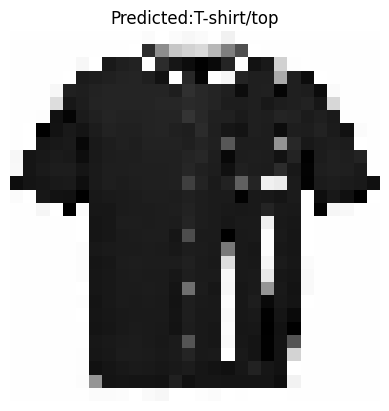

In [ ]:
# Check result
plt.imshow(image,cmap='gray')
plt.title(f'Predicted:{fashion_mnist_labels[prediction2]}')
plt.axis('off')
plt.show()

In [30]:
# save the model
model.save("my_model.keras")

In [31]:
# reload the model
from tensorflow.keras.models import load_model

loaded_model = load_model("my_model.keras")